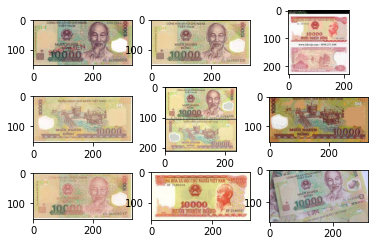

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/dulieu/tienvn/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'10000dong'+str(i+1)+'.bmp'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [3]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/dulieu/tienvn/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('200dong'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('500dong'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('1000dong'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('2000dong'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('5000dong'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('10000dong'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('20000dong'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('50000dong'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('100000dong'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('200000dong'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('500000dong'):
    output = 10
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('11TienGiay_photos.npy', photos)
save('11TienGiay_labels.npy', labels)

(110, 200, 200, 3) (110,)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
 history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
4/4 [==============================] - 15s 210ms/step - loss: 11416.2305 - accuracy: 0.0636
Epoch 2/50
4/4 [==============================] - 0s 75ms/step - loss: 3130.3328 - accuracy: 0.0909
Epoch 3/50
4/4 [==============================] - 0s 73ms/step - loss: 165.3903 - accuracy: 0.1091
Epoch 4/50
4/4 [==============================] - 0s 74ms/step - loss: 23.8469 - accuracy: 0.2182
Epoch 5/50
4/4 [==============================] - 0s 74ms/step - loss: 4.9056 - accuracy: 0.3273
Epoch 6/50
4/4 [==============================] - 0s 74ms/step - loss: 2.3443 - accuracy: 0.3455
Epoch 7/50
4/4 [==============================] - 0s 73ms/step - loss: 1.8645 - accuracy: 0.4000
Epoch 8/50
4/4 [==============================] - 0s 73ms/step - loss: 1.6227 - accuracy: 0.4455
Epoch 9/50
4/4 [==============================] - 0s 74ms/step - loss: 1.4198 - accuracy: 0.5364
Epoch 10/50
4/4 [==============================] - 0s 74ms/step - loss: 1.2814 - accuracy: 0.5636
Epoch 11/50
4/4 [

In [6]:
model.evaluate(photos,labels)

4/4 [==============================] - 1s 46ms/step - loss: 0.7856 - accuracy: 0.7364


[0.7856161594390869, 0.7363636493682861]

In [7]:
model.save('11TienGiay_Final.h5')

In [8]:
from keras.models import load_model
models=load_model('11TienGiay_Final.h5')

In [9]:
classes = ["200dong","500dong","1000dong","2000dong","5000dong","10000dong","20000dong","50000dong","100000dong","200000dong","500000dong"]

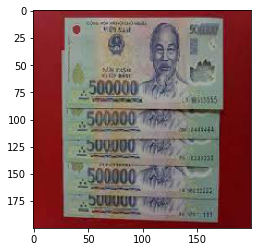

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/dulieu/tienvn/500000dong6.bmp', target_size=(200,200))
plt.imshow(img)

In [16]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.09782896 0.09210864 0.07942425 0.08321018 0.09233128 0.0964509
  0.08218637 0.09163383 0.08790364 0.08900043 0.10792142]]


'500000dong'